In [1]:
#! jupyter nbconvert --to html dataset-preprocess.ipynb

In [2]:
""" 
dependencies:
  - python=3.8.17
  - numpy=1.24.0
  - matplotlib=3.7.1
  - pandas=2.0.2 
"""

' \ndependencies:\n  - python=3.8.17\n  - numpy=1.24.0\n  - matplotlib=3.7.1\n  - pandas=2.0.2 \n'

In [3]:
import os
import random
import datetime
from itertools import product 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# import random
# random.seed(42)
# np.random.seed(42)
# np.random.RandomState(42)
# os.environ['TF_DETERMINISTIC_OPS'] = '1' 

In [4]:
finish_sound = "afplay /Users/mehmet/Documents/vs-code/winsquare.mp3"
# play sound when finished
# os.system(finish_sound)

In [5]:
classes = ['Non_Demented','Very_Mild_Demented','Mild_Demented','Moderate_Demented']
folder_path = '/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
datafile = ['','','','']
dataframe = pd.DataFrame()
for i in range(len(classes)):
    datafile[i] = sorted(os.listdir(folder_path + classes[i]))
    filenames = pd.DataFrame(datafile[i], columns=['filename'])
    class_labels = pd.DataFrame(np.full((len(datafile[i]),1), classes[i]), columns=['class_label'])
    dataframe = pd.concat([dataframe, pd.concat([filenames, class_labels], axis=1)], axis=0)
dataframe = dataframe.reset_index(drop=True)
dataframe['class_label'] = dataframe['class_label'].str[:]
classes = dataframe['class_label'].unique()
dataframe

,filename,class_label
0,non.jpg,Non_Demented
1,non_10.jpg,Non_Demented
2,non_100.jpg,Non_Demented
3,non_1000.jpg,Non_Demented
4,non_1001.jpg,Non_Demented
...,...,...
6395,moderate_63.jpg,Moderate_Demented
6396,moderate_64.jpg,Moderate_Demented
6397,moderate_7.jpg,Moderate_Demented
6398,moderate_8.jpg,Moderate_Demented


In [6]:
class_counts = []
for i in datafile:
    class_counts.append(len(i)) 
    print('There are',len(i),'images belonging to',classes[datafile.index(i)], 'class')
print('Total number of images:', sum(class_counts))

There are 3200 images belonging to Non_Demented class
There are 2240 images belonging to Very_Mild_Demented class
There are 896 images belonging to Mild_Demented class
There are 64 images belonging to Moderate_Demented class
Total number of images: 6400


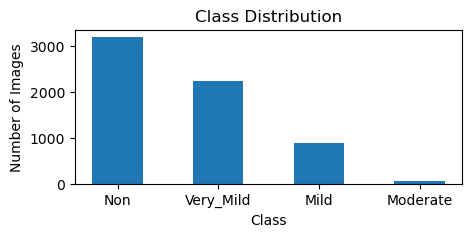

In [7]:
# Plot class distribution

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 2)
bins = np.linspace(0 - .25, 3 + .25, 8)
ax.hist(dataframe['class_label'].str[:-9].values,bins=bins)
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
plt.show()

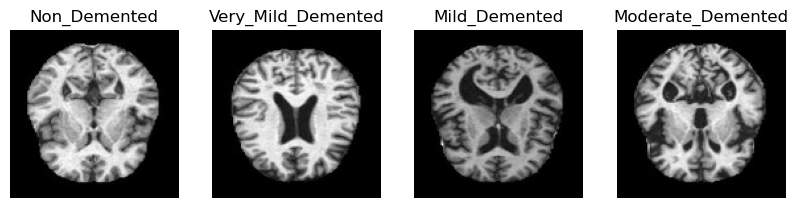

In [8]:
# Display 1 random images from each class

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(10, 5)
for i in range(len(classes)):
    for j in range(1):
        # get random image dataframe
        start = dataframe[dataframe['class_label']==classes[i]].first_valid_index()
        end = dataframe[dataframe['class_label']==classes[i]].last_valid_index() 
        sample = np.random.randint(start, end)-start
        dataframe[dataframe['class_label']==classes[i]].iloc[sample,0]
        random_image = dataframe[dataframe['class_label']==classes[i]].iloc[sample,0]
        filename = folder_path + classes[i] + '/' + random_image
        ax[i].imshow(plt.imread(filename), cmap='gray')
        ax[i].set_title(classes[i])
        ax[i].axis('off')
plt.show()

In [9]:
# Convert all images to numpy array and flatten them

folderpath ='/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
image_data = []
for instance in dataframe['filename']:
    # find class label
    folder_name = dataframe[dataframe['filename']==instance]['class_label'].values[0] + '/'
    image2 = plt.imread(folderpath+folder_name+instance)
    image2_flatten = image2.flatten().T
    image_data.append(image2_flatten)
image_arr = np.array(image_data)
output_labels = np.array(dataframe['class_label'].values)
image_arr.shape, output_labels.shape

((6400, 16384), (6400,))

In [10]:
# Create dataframe from image array

image_df = pd.DataFrame(image_arr)
# Rescale pixel values
#image_df = image_df/255
image_df.columns = image_df.columns.astype(str)
image_df['filename'] = dataframe['filename']
image_df['class_label'] = output_labels
image_df

,0,1,2,3,4,5,6,7,8,9,...,16376,16377,16378,16379,16380,16381,16382,16383,filename,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non.jpg,Non_Demented
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_10.jpg,Non_Demented
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_100.jpg,Non_Demented
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1000.jpg,Non_Demented
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1001.jpg,Non_Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,moderate_63.jpg,Moderate_Demented
6396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,moderate_64.jpg,Moderate_Demented
6397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,moderate_7.jpg,Moderate_Demented
6398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,moderate_8.jpg,Moderate_Demented


In [11]:
def train_test_split(dataframe, test_size, validation_size=0, random_state=42):
    # Function to split pandas dataframe into train, test and validation sets
    """ Split data into train and test sets.
    Args:
        dataframe (pandas dataframe): Input Pandas Dataframe
        test_size (float): float between 0 and 1
        validation_size (float): float between 0 and 1
        random_state (int): random seed
    """
    class_labels = dataframe['class_label'].unique()
    dataframe = dataframe.sample(frac=1, random_state=random_state).reset_index(drop=True)
    train_size = 1 - test_size - validation_size
    # train 
    train_df = pd.DataFrame()
    for i in range(len(classes)):
        train_df = pd.concat([train_df, dataframe[dataframe['class_label']==classes[i]].iloc[:round(class_counts[i]*train_size),:]], axis=0)
    train_df = train_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # test
    test_df = pd.DataFrame()
    for i in range(len(classes)):
        test_df = pd.concat([test_df, dataframe[dataframe['class_label']==classes[i]].iloc[round(class_counts[i]*(train_size+validation_size)):,:]], axis=0)
    test_df = test_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    if validation_size > 0:
        # validation
        val_df = pd.DataFrame()
        for i in range(len(classes)):
            val_df = pd.concat([val_df, dataframe[dataframe['class_label']==classes[i]].iloc[round(class_counts[i]*train_size):round(class_counts[i]*(1-validation_size)),:]], axis=0)
        val_df = val_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
        
        return train_df, val_df, test_df
    return train_df, test_df

In [12]:
def delete_zero_columns(dataframe):
    # X: dataframe
    k = dataframe['filename']
    y = dataframe['class_label']
    X = dataframe.drop(['filename','class_label'], axis=1).values
    mean_ = np.mean(X, axis=0)
    scale_ = np.std(X - mean_, axis=0)
    if np.any(scale_ == 0):
        mask = np.where(scale_ == 0)
    X_new = np.delete(X, mask, axis=1)
    out_df = pd.concat([pd.DataFrame(X_new), k, y], axis=1)
    return out_df

In [13]:
image_df_clean = delete_zero_columns(image_df)
train_df, val_df, test_df = train_test_split(image_df_clean, test_size=0.1, validation_size=0.1, random_state=42)

train_df.shape,val_df.shape, test_df.shape

((5120, 10861), (640, 10861), (640, 10861))

In [14]:
class StandardScaler():
    # StandardScaler Class written from scratch similar to sklearn.preprocessing.StandardScaler
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        if np.any(self.scale_ == 0):
            self.scale_ = np.where(self.scale_ == 0, 1, self.scale_)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [15]:
class OneHotEncoder():
    def __init__(self):
        pass
    
    def fit(self, classes_encode=None, y=None):
        """ Which class is encoded as which number
        Args:
            classes_encode (dict): Dictionary of classes and their encoded values
        """
        if classes_encode is None:
            self.classes_encode = {class_:i for i, class_ in enumerate(np.unique(y))}
        if y is None:
            self.classes_encode = classes_encode
        return self
        
    def transform(self, y):
        """ One hot encoder
        Args:
            y (pandas dataframe): Output labels
        """

        for i in y:
            y = y.replace(i, self.classes_encode[i])
        # One-hot encoding
        y_onehot = np.zeros((len(y.values), 4))
        for i in range(len(y)):
            y_onehot[i][y[i]] = 1
            
        return y_onehot

In [16]:
X_train = train_df.drop(['filename','class_label'], axis=1).values
y_train = train_df['class_label']
X_val = val_df.drop(['filename','class_label'], axis=1).values
y_val = val_df['class_label']
X_test = test_df.drop(['filename','class_label'], axis=1).values
y_test = test_df['class_label']

# Scale data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Encode Labels with given dictionary
classes_encode = {'Non_Demented':0, 'Very_Mild_Demented':1, 'Mild_Demented':2, 'Moderate_Demented':3}
encoder = OneHotEncoder()
encoder.fit(classes_encode)
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)
    
print(X_train.shape, y_train.shape,'\n', X_val.shape, y_val.shape,'\n', X_test.shape, y_test.shape)

(5120, 10859) (5120, 4) 
 (640, 10859) (640, 4) 
 (640, 10859) (640, 4)


In [17]:
# # Save data to numpy arrays
# np.save('dataset/original-numpy/X_train.npy', X_train)
# np.save('dataset/original-numpy/y_train.npy', y_train)
# np.save('dataset/original-numpy/X_val.npy', X_val)
# np.save('dataset/original-numpy/y_val.npy', y_val)
# np.save('dataset/original-numpy/X_test.npy', X_test)
# np.save('dataset/original-numpy/y_test.npy', y_test)

In [18]:
# PCA on training data
images = X_train
mean = np.mean(images, axis=0)
data_mn = images - mean
cov_mat = np.matmul(data_mn.T,data_mn)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

#sort the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
total_variance = np.sum(eigenvalues)

#calculate the variance explained by each eigenvalue for first 10 eigenvalues
variance_explained = [(i/total_variance)*100 for i in eigenvalues]

In [19]:
percs=[90,95,99]
for perc in percs:
    printed = 0
    for i in range(len(variance_explained)):
        variance_until_i = np.sum(variance_explained[:i+1])
        if i < 10:
            pass
            #print(str(i+1)+'. principal component |','PVE:',variance_explained[i].round(3),'| Cumulative PVE:',variance_until_i.round(3))
        
        if variance_until_i >= perc:
            if printed == 0:
                printed = 1
                print('First',str(i+1),'PCs explain more than {}% of the data:'.format(perc), variance_until_i.round(3))


First 1030 PCs explain more than 90% of the data: (90.006+0j)
First 1581 PCs explain more than 95% of the data: (95.001+0j)
First 2789 PCs explain more than 99% of the data: (99+0j)


In [20]:
variance_until_i_list = []
for i in range(len(variance_explained)):
    variance_until_i = np.sum(variance_explained[:i+1])
    variance_until_i_list.append(variance_until_i)

/Users/mehmet/miniforge3/envs/data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


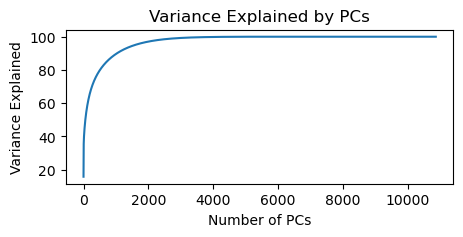

In [21]:
# Plot variance until ith list
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 2)
ax.plot(variance_until_i_list)
ax.set_title('Variance Explained by PCs')
ax.set_xlabel('Number of PCs')
ax.set_ylabel('Variance Explained')
plt.show()

In [22]:
# Reconstruct images using first k principal components
k=2789
first_k_eigen = eigenvectors[:,:k].T
#projection = np.matmul(images-mean,first_k_eigen.T)
#projection = np.matmul(projection,first_k_eigen) + mean
# Use float64
projection = np.matmul(images-mean,first_k_eigen.T).astype(np.float64)
projection = np.matmul(projection,first_k_eigen).astype(np.float64) + mean.astype(np.float64)
X_train_pca = projection
X_train_pca.shape

/var/folders/8c/r_rgg7rn3_1753l7y7gh1vqm0000gn/T/ipykernel_6101/2914424627.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  projection = np.matmul(images-mean,first_k_eigen.T).astype(np.float64)
/var/folders/8c/r_rgg7rn3_1753l7y7gh1vqm0000gn/T/ipykernel_6101/2914424627.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  projection = np.matmul(projection,first_k_eigen).astype(np.float64) + mean.astype(np.float64)


(5120, 10859)

In [23]:
# Save pca applied train data to numpy array

# np.save('dataset/original-numpy/X_train_pca_2.npy', X_train_pca)